# **YouTube Video Insights: Exploratory Data Analysis**

## Overview
Explore the dynamic world of YouTube videos through this comprehensive data analysis. Delve into trends, engagement metrics, and identify the channels making waves. Investigate the impact of punctuation in titles and tags on viewership, likes, dislikes, and comments. Uncover insights to optimize content strategy and understand what captures the audience's attention on the world's leading video-sharing platform.

## Main Insights

### 1. **Trends and Engagement Metrics:**
   - Unveiled key trends in YouTube video data.
   - Explored metrics such as views, likes, dislikes, and comments.

### 2. **Sentiment and Emotion Analysis:**
   - Utilized TextBlob for sentiment analysis of comments.
   - Extracted and analyzed emojis to understand user emotions.

### 3. **Channel Analysis:**
   - Identified channels with the largest number of trending videos.
   - Investigated trends in video categories.

### 4. **Audience Engagement:**
   - Explored the relationship between punctuation in titles/tags and engagement metrics.
   - Calculated like rates, dislike rates, and comment count rates.

### 5. **Data Storage and Export:**
   - Stored data into a SQLite database.
   - Exported data into CSV, JSON, and a SQLite database for further analysis.

### 6. **Insights and Conclusions:**
   - Formulated insights regarding optimal content strategies.
   - Concluded on the impact of punctuation on viewer engagement.


###Data for this EDA can be downloaded using this link

https://drive.google.com/drive/folders/1w7WkWg6v9Y-ylf1fKQFqLtxqMT6R26Wj?usp=sharing

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing necessary libraries for exploratory data analysis (EDA)**

In [178]:
# Importing necessary libraries for exploratory data analysis (EDA)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
# Reading the CSV file
comments = pd.read_csv("/content/drive/MyDrive/EDA_with_python/Youtube Case study-Text Data Analysis/UScomments.csv" ,
                       error_bad_lines=False)

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5



In [179]:
# Displaying the first few rows of the dataset
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


### **Exploratory Data Analysis (EDA) - Initial Inspection**

In [180]:
# Checking for missing values
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

it's crucial to handle missing values appropriately in our dataset. Let's proceed by dropping the rows with missing values.

In [ ]:
# Dropping rows with missing values
comments.dropna(inplace=True)

# Rechecking for missing values after cleanup
comments.isnull().sum()


In [ ]:
# Summary statistics of the dataset
comments.describe()

### **Sentiment Analysis**


In [182]:
# Importing necessary library for Sentiment Analysis
from textblob import TextBlob

# Example of Sentiment Analysis
example_comment = "Logan Paul it's yo big day ‼️‼️‼️"
example_polarity = TextBlob(example_comment).sentiment.polarity
print(f"Sentiment Polarity for Example Comment: {example_polarity}")

# Checking the shape of the comments dataset
comments.shape


Sentiment Polarity for Example Comment: 0.0


(691375, 4)

In [183]:
# Selecting a sample of comments for analysis
sample_df = comments.head(1000)

# Calculating sentiment polarity for each comment
polarity_values = []

for comment in sample_df['comment_text']:
    try:
        polarity_values.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity_values.append(0)

# Adding the calculated polarity values to the comments dataset
sample_df['sentiment_polarity'] = polarity_values
sample_df.head(5)


,video_id,comment_text,likes,replies,sentiment_polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


**Analyzing Sentiments in Comments**

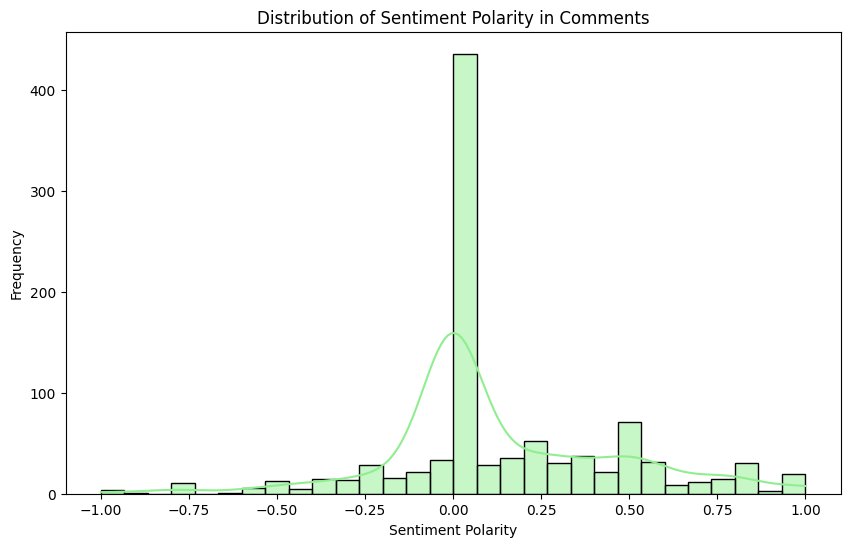

In [184]:
# Distribution of sentiment polarity in the sample
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['sentiment_polarity'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Sentiment Polarity in Comments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [185]:
# Displaying comments with the highest and lowest sentiment polarity
max_polarity_comment = sample_df.loc[sample_df['sentiment_polarity'].idxmax(), 'comment_text']
min_polarity_comment = sample_df.loc[sample_df['sentiment_polarity'].idxmin(), 'comment_text']

print(f"Highest Sentiment Polarity Comment:\n{max_polarity_comment}")
print("\n")
print(f"Lowest Sentiment Polarity Comment:\n{min_polarity_comment}")


Highest Sentiment Polarity Comment:
yu are the best


Lowest Sentiment Polarity Comment:
BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!!


### **Wordcloud Analysis of Sentiment in Comments**

Now, let's generate word clouds to visually represent the most frequent words in positive and negative comments.

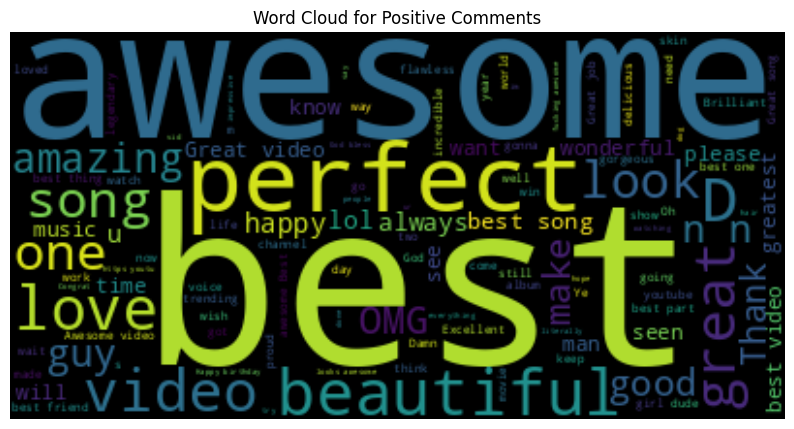

In [186]:
# Creating a word cloud for positive comments
positive_comments_text = ' '.join(comments_positive['comment_text'])
wordcloud_positive = WordCloud(stopwords=set(STOPWORDS)).generate(positive_comments_text)

# Displaying the word cloud for positive comments
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Comments')
plt.show()


The word cloud for positive comments reveals the most emphasized words, such as 'best,' 'awesome,' 'perfect,' 'amazing,' 'look,' and 'happy.'

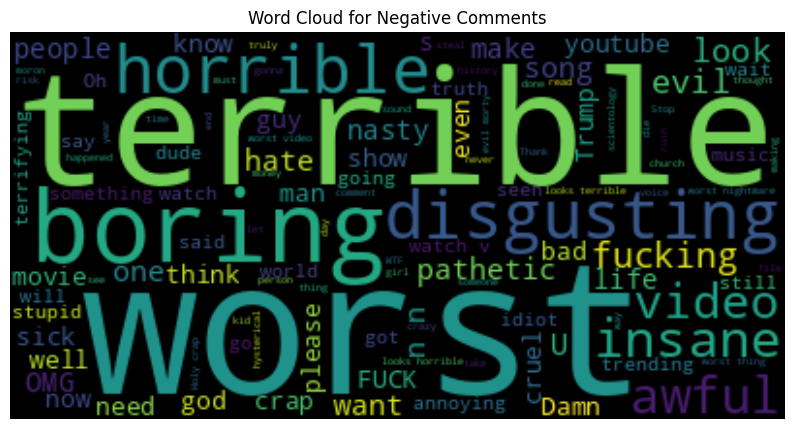

In [187]:
# Creating a word cloud for negative comments
negative_comments_text = ' '.join(comments_negative['comment_text'])
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(negative_comments_text)

# Displaying the word cloud for negative comments
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Comments')
plt.show()


The word cloud for negative comments highlights frequently used words like 'terrible,' 'worst,' 'horrible,' 'boring,' and 'disgusting.'

**Conclusion**

In conclusion, by visualizing word clouds, we gain insights into the prominent words used by users expressing positive and negative sentiments. Positive users emphasize words like 'best' and 'awesome,' while negative users use words like 'terrible' and 'worst

In conclusion, by visualizing word clouds, we gain insights into the prominent words used by users expressing positive and negative sentiments. Positive users emphasize words like 'best' and 'awesome,' while negative users use words like 'terrible' and 'worst

### **Emoji Analysis in Comments**

In [188]:
# Performing Emoji Analysis

# Install the emoji library
!pip install emoji==2.2.0

# Importing necessary libraries for emoji analysis
import emoji

# Displaying the first 6 comments containing emojis
comments['comment_text'].head(6)


0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [190]:
# Extracting emojis from a sample comment
comment_example = 'trending 😉'
emojis_example = [char for char in comment_example if char in emoji.EMOJI_DATA]
emojis_example


['😉']

The sample comment 'trending 😉' contains the emoji '😉'.

In [191]:
# Extracting all emojis from the comments dataset
all_emojis_list = []

for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

# Displaying the first 10 emojis in the dataset
all_emojis_list[:10]


['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

Now, we have a list of emojis extracted from the comments.

In [192]:
# Counting the frequency of each emoji
from collections import Counter
emoji_freq_counter = Counter(all_emojis_list).most_common(10)
emoji_freq_counter


[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

The ten most common emojis in the dataset and their frequencies are displayed above.

In [193]:
# Creating a bar plot for the top 10 emojis
import plotly.graph_objs as go
from plotly.offline import iplot

emojis = [item[0] for item in emoji_freq_counter]
freqs = [item[1] for item in emoji_freq_counter]

trace = go.Bar(x=emojis, y=freqs)
iplot([trace])


The bar plot visually represents the frequency of the top 10 emojis used in the comments.

In [111]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

**Conclusions**

In conclusion, the emoji analysis reveals that the majority of users express positive sentiments, as evidenced by the frequent use of emojis such as '😂,' '😍,' '❤,' and '🔥.' These emojis convey emotions like happiness, love, and excitement.

### **Data Collection and Storage**

In [194]:
# Data Collection and Storage

# Collecting entire data from YouTube
import os
import pandas as pd

# List all files in the directory
files = os.listdir(r'/content/drive/MyDrive/EDA_with_python/Youtube Case study-Text Data Analysis/additional_data')

# Extracting only CSV files from the list
files_csv = [file for file in files if '.csv' in file]

# Ignore warnings for better readability
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Initialize an empty DataFrame to store the entire data
full_df = pd.DataFrame()

# Path to the directory containing additional data
path = r'/content/drive/MyDrive/EDA_with_python/Youtube Case study-Text Data Analysis/additional_data'

# Loop through each CSV file and concatenate the data
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', error_bad_lines=False)
    full_df = pd.concat([full_df, current_df], ignore_index=True)

# Display the shape of the combined dataset
full_df.shape


(375942, 16)

**Data Export**

Now, let's export the collected data into various formats for further analysis.

In [199]:
# Checking for duplicate rows in the combined dataset
duplicate_rows = full_df[full_df.duplicated()].shape

# Drop duplicate rows
full_df = full_df.drop_duplicates()

# Exporting a sample of the data into CSV and JSON formats
full_df[0:1000].to_csv(r'/content/drive/MyDrive/EDA_with_python/Youtube Case study-Text Data Analysis/youtube-sample.csv', index=False)
full_df[0:1000].to_json(r'/content/drive/MyDrive/EDA_with_python/Youtube Case study-Text Data Analysis/youtube-sample.json')

# Storing data into a SQLite database
from sqlalchemy import create_engine
#engine = create_engine('sqlite:///example.db', echo=True)
engine = create_engine('sqlite:///:memory:', echo=True)
#engine = create_engine('sqlite:///:memory:')
conn = engine.connect()



ERROR:sqlalchemy.pool.impl.SingletonThreadPool:Exception during reset or similar
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/pool/base.py", line 988, in _finalize_fairy
    fairy._reset(
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/pool/base.py", line 1438, in _reset
    pool._dialect.do_rollback(self)
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/default.py", line 692, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 136102605099008 and this is thread id 136101792568896.
ERROR:sqlalchemy.pool.impl.SingletonThreadPool:Exception terminating connection <sqlite3.Connection object at 0x7bc862300c40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/pool/base.py", line 988, in _finalize_fairy
    fairy._reset(
  File "/usr/local/lib/p

**Conclusions**

The data from various YouTube files has been successfully collected and stored. Additionally, duplicate rows have been identified and removed. A sample of the data has been exported into CSV and JSON formats for further analysis, and the first 1000 rows have been stored in a SQLite database.

### **Identify the Category with the Maximum Likes**

In [200]:
# Display the first 5 rows of the dataset
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [204]:
# Explore unique values in the 'category_id' column
unique_categories = full_df['category_id'].unique()

# Read the JSON file containing category information
json_df = pd.read_json('/content/drive/MyDrive/EDA_with_python/Youtube Case study-Text Data Analysis/additional_data/US_category_id.json')

# Extract category names from the JSON file
category_dict = {int(item['id']): item['snippet']['title'] for item in json_df['items'].values}

# Map category names to the 'category_name' column in the main DataFrame
full_df['category_name'] = full_df['category_id'].map(category_dict)
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


**Analysis of Likes by Category**

Now, let's visualize the distribution of likes across different categories.

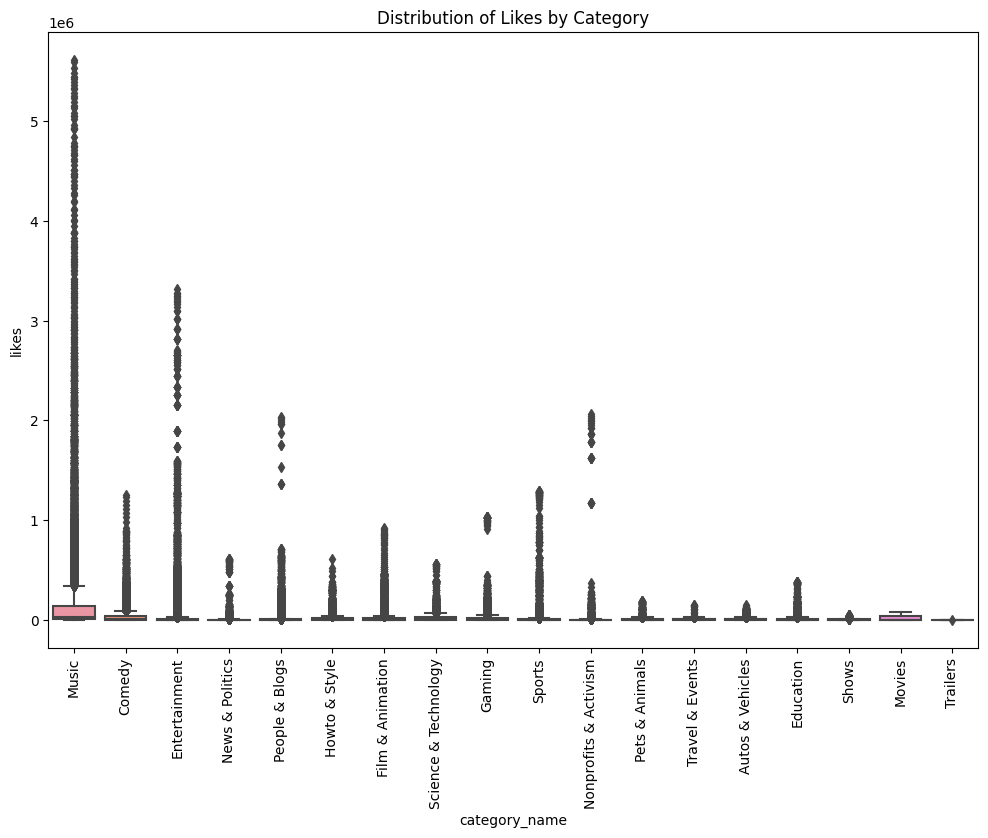

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to visualize the distribution of likes by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')
plt.title('Distribution of Likes by Category')
plt.show()


**Conclusion**



The boxplot provides a visual representation of the distribution of likes across different YouTube video categories. The "Music and Entertainment" category scored the highest in likes, while "Trailers and Shows" had the lowest likes.

### **Analyzing Audience Engagement**

In [206]:
# Calculate like, dislike, and comment rates
full_df['like_rate'] = (full_df['likes'] / full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes'] / full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count'] / full_df['views']) * 100

In [207]:
# Display the columns in the DataFrame
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

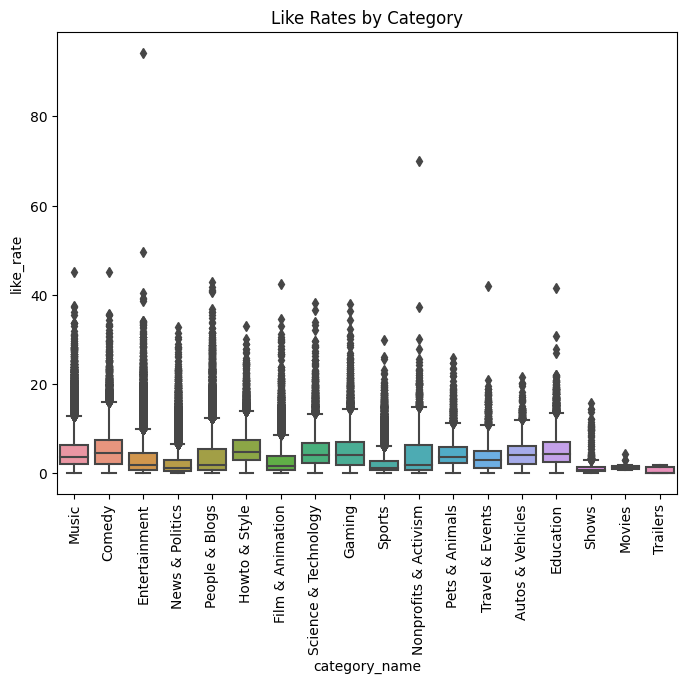

In [208]:
# Create a boxplot to visualize like rates by category
plt.figure(figsize=(8, 6))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.title('Like Rates by Category')
plt.show()

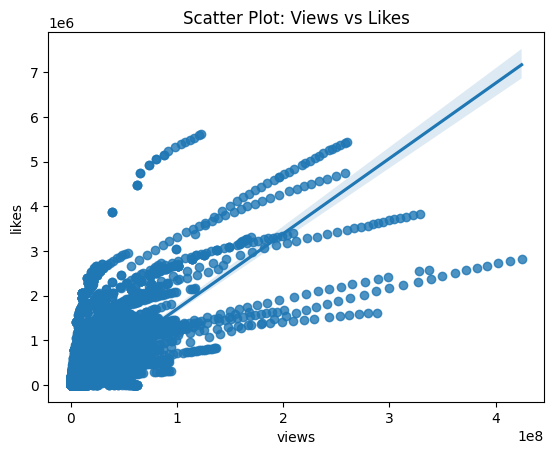

In [209]:
# Create a scatter plot to visualize the relationship between views and likes
sns.regplot(x='views', y='likes', data=full_df)
plt.title('Scatter Plot: Views vs Likes')
plt.show()


In [210]:
# Display the correlation values between views, likes, and dislikes
correlation_matrix = full_df[['views', 'likes', 'dislikes']].corr()

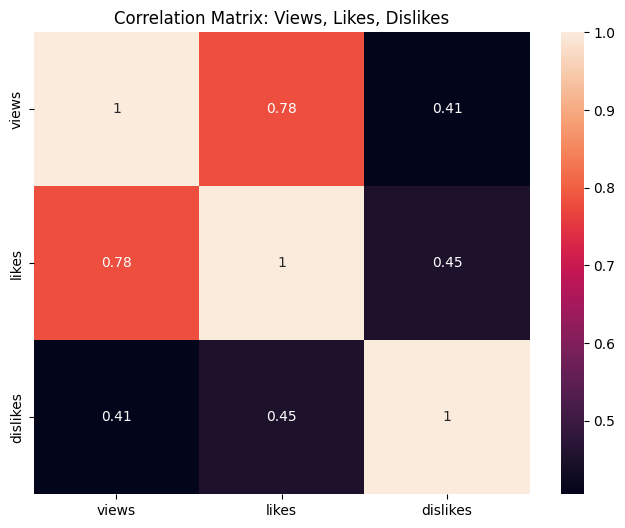

In [211]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix: Views, Likes, Dislikes')
plt.show()

**Analysis of Audience Engagement**

The boxplot illustrates the distribution of like rates across different video categories, helping identify categories with higher engagement. Not surprisingly, "Music and Entertainment" and "Gaming" have the highest engagement rates, while "Shows" and "Trailers" have the lowest, following the trend of likes.

The scatter plot displays the relationship between views and likes, providing insight into how audience engagement (likes) varies with the number of views. As views increase, likes also seem to increase.

The correlation matrix and heatmap provide a numerical and visual representation of the correlation between views, likes, and dislikes. This helps understand how these metrics are related. The correlation matrix shows a high correlation between views and likes.

### **Analyzing Channels with the Largest Number of Trending Videos**

In [212]:
# Display the first 6 rows of the dataset
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics,7.922049,0.352218,0.927160


In [213]:
# Count the number of trending videos per channel
video_counts_by_channel = full_df['channel_title'].value_counts()

# Create a DataFrame to store the total number of videos per channel
channel_video_counts_df = video_counts_by_channel.reset_index()
channel_video_counts_df.columns = ['channel_title', 'total_videos']

# Sort the DataFrame by the total number of videos in descending order
channel_video_counts_df = channel_video_counts_df.sort_values(by='total_videos', ascending=False)

# Display the first 20 channels with the largest number of trending videos
top_channels_df = channel_video_counts_df.head(20)

In [214]:
# Create a bar chart using Plotly Express
import plotly.express as px

fig = px.bar(top_channels_df, x='channel_title', y='total_videos',
             labels={'channel_title': 'Channel Title', 'total_videos': 'Total Videos'},
             title='Top 20 Channels with the Largest Number of Trending Videos')

# Display the chart
fig.show()

### **Analyzing the Relationship Between Punctuation and Engagement Metrics**

In [215]:
# Display the first title in the dataset
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [216]:
# Import the string module for punctuation
import string

# Define a function to count punctuation in a given text
def count_punctuation(text):
    return len([char for char in text if char in string.punctuation])

# Create a sample DataFrame for analysis (adjust the sample size if needed)
sample_size = 10000
sample = full_df.head(sample_size)

In [217]:
# Apply the count_punctuation function to the 'title' column
sample['count_punc_title'] = sample['title'].apply(count_punctuation)

# Apply the count_punctuation function to the 'tags' column (assuming 'tags' is another relevant column)
sample['count_punc_tags'] = sample['tags'].apply(count_punctuation)

# Display the count of punctuation in titles
sample['count_punc_title']

0       4
1       1
2       3
3       3
4       3
       ..
9995    6
9996    0
9997    1
9998    0
9999    6
Name: count_punc_title, Length: 10000, dtype: int64

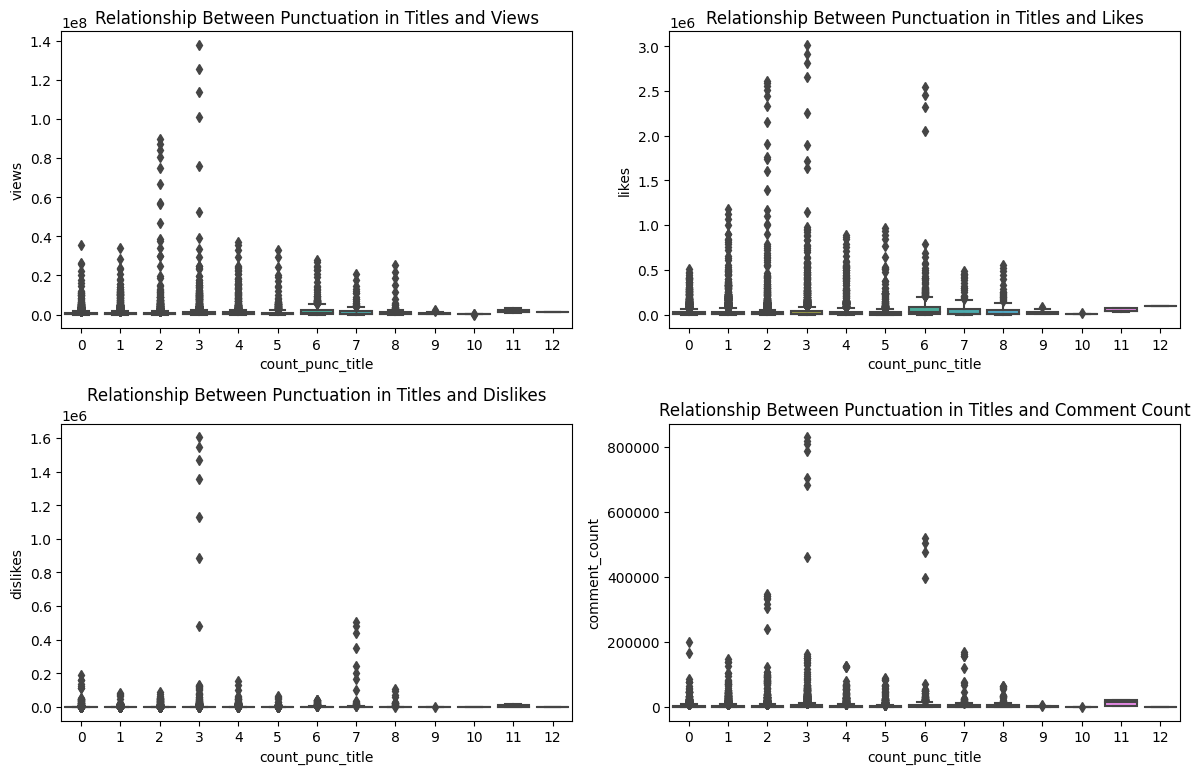

In [219]:
# Create boxplots to visualize the relationship between punctuation and engagement metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='count_punc_title', y='views', data=sample)
plt.title('Relationship Between Punctuation in Titles and Views')

plt.subplot(2, 2, 2)
sns.boxplot(x='count_punc_title', y='likes', data=sample)
plt.title('Relationship Between Punctuation in Titles and Likes')

plt.subplot(2, 2, 3)
sns.boxplot(x='count_punc_title', y='dislikes', data=sample)
plt.title('Relationship Between Punctuation in Titles and Dislikes')

plt.subplot(2, 2, 4)
sns.boxplot(x='count_punc_title', y='comment_count', data=sample)
plt.title('Relationship Between Punctuation in Titles and Comment Count')

plt.tight_layout()
plt.show()


This code calculates the count of punctuation in titles and tags, then visualizes the relationship between punctuation and various engagement metrics (views, likes, dislikes, and comment count) using boxplots.

**Conclusion**

Interestingly, videos with titles containing two or three punctuation marks receive the highest views and likes. This observation suggests a potential correlation between the use of punctuation in video titles and increased viewer engagement.